This is an in-class exercise on using `ggplot2`.

Note, that this example is from the_grammar.R on [http://had.co.nz/ggplot2](). I've adapted this for psych 251 purposes

First install and load the package. It's part of the "core tidvyerse".

```{r}
library(tidyverse)
```

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg

import pandas
from pandas import DataFrame
sns.set()

diamonds = sns.load_dataset("diamonds")

# Exploring ggplot2 using `qplot`

We'll start by using `qplot`. `qplot` is the easy interface, meant to replace `plot`. You can give it simple `qplot(x,y)` examples, or slightly more complex examples like `qplot(x, y, col=grp, data=d)`. 

We're going to be using the `diamonds` dataset. This is a set of measurements of diamonds, along with their price etc.


```{r}
head(diamonds)
qplot(diamonds$carat, diamonds$price)
```

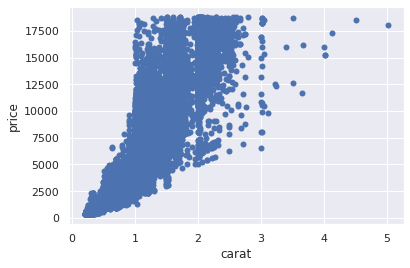

In [35]:
sns.scatterplot(x='carat', y='price', data=diamonds, linewidth=0)

Scatter plots are trivial, and easy to add features to. Modify this plot so that it uses the dataframe rather than working from variables in the general namespace (good to get away from retyping `diamonds$` every time you reference a variable). 

```{r}

```

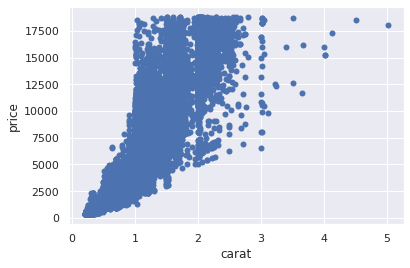

In [36]:
sns.scatterplot(x='carat', y='price', data=diamonds, linewidth=0) #not possible in Python

Try adding clarity and cut, using shape and color as your visual variables. 

```{r}
```

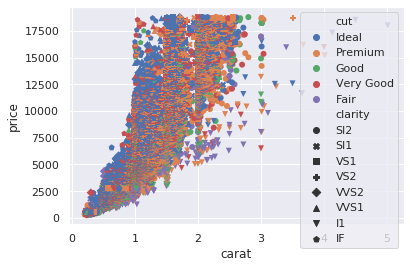

In [37]:
sns.scatterplot(x='carat', y='price', style='clarity', hue='cut', data=diamonds, linewidth=0) #not possible in Python

# More complex with `ggplot`

`ggplot` is just a way of building `qplot` calls up more systematically. It's
sometimes easier to use and sometimes a bit more complicated. What I want to show off here is the functionality of being able to build up complex plots with multiple elements. You can actually do this using `qplot` pretty easily, but there are a few things that are hard to do. 

`ggplot` is the basic call, where you specify A) a dataframe and B) an aesthetic (`aes`) mapping from variables in the plot space to variables in the dataset. 

```{r}
d <- ggplot(diamonds, aes(x=carat, y=price)) # first you set the aesthetic and dataset
d + geom_point() # then you add geoms
d + geom_point(aes(colour = carat)) # and you can keep doing this to add layers to the plot
```

Try writing this as a single set of additions (e.g. one line of R code, though you can put in linebreaks). This is the most common workflow for me. 


```{r}

```


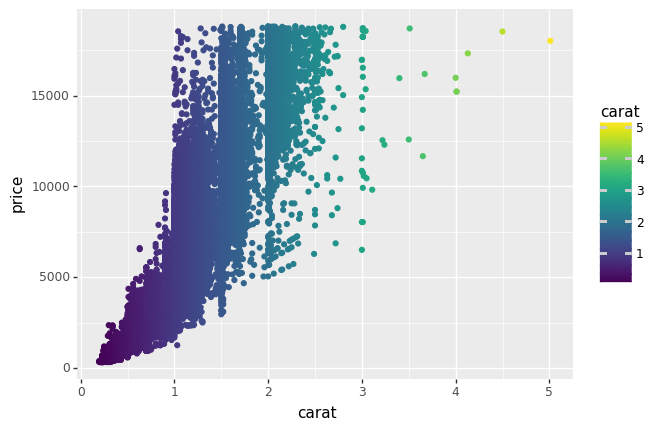

<ggplot: (8779759073512)>

In [47]:
gg.ggplot(mapping=gg.aes(x='carat', y='price'), data=diamonds) + \
    gg.geom_point(mapping = gg.aes(color='carat'))

# Facets

Let's try out another version of the `qplot` example above. Rewrite the last qplot example with ggplot.

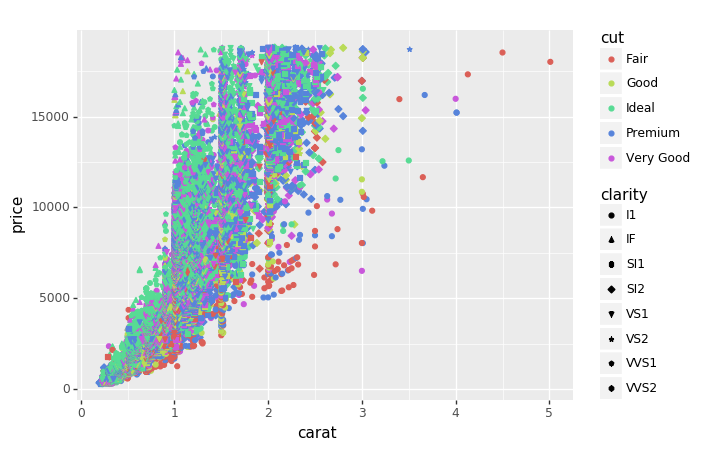

<ggplot: (8779756636073)>

In [51]:
gg.ggplot(mapping=gg.aes(x='carat', y='price'), data=diamonds) + \
    gg.geom_point(mapping = gg.aes(color='cut', shape='clarity'))


One of the primary benefits of `ggplot2` is the use of facets - also known as small multiples in the Tufte vocabulary. That last plot was probably hard to read. Facets could make it better. Try adding `facet_grid(x ~ y)`.  `x ~ y` means row facets are by `x`, column facets by `y`. 

```{r}

```

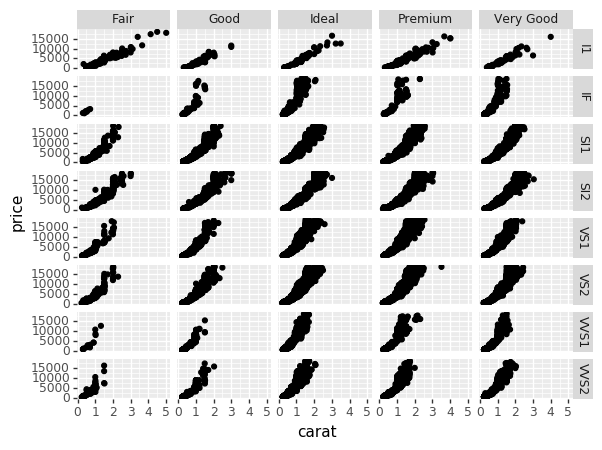

<ggplot: (8779758338908)>

In [57]:
gg.ggplot(mapping=gg.aes(x='carat', y='price'), data=diamonds) + \
    gg.facet_grid(['clarity', 'cut']) + \
    gg.geom_point()
#     gg.geom_point(mapping = gg.aes(color='cut', shape='clarity'))

But facets can also get overwhelming. Try to strike a good balance between color, shape, and faceting.

HINT: `facet_grid(. ~ x)` puts x on the columns, but `facet_wrap(~ x)` (no dot) *wraps* the facets. 

```{r}

```

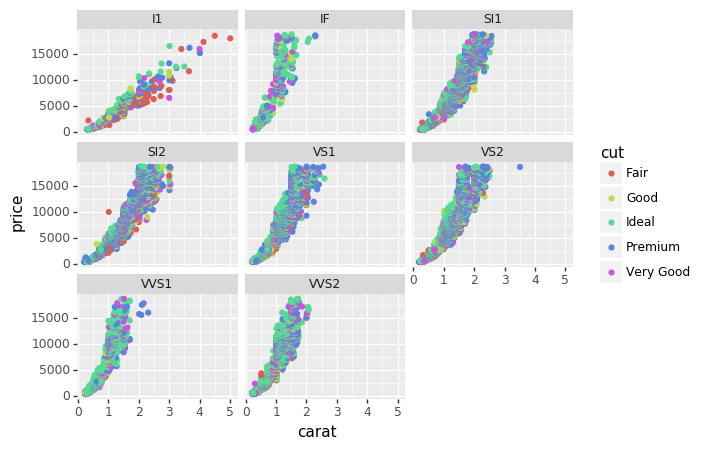

<ggplot: (8779749146495)>

In [69]:
gg.ggplot(mapping=gg.aes(x='carat', y='price'), data=diamonds) + \
    gg.facet_wrap('~ clarity') + \
    gg.geom_point(mapping=gg.aes(color='cut'))

# Geoms

As you've seen above, the basic unit of a ggplot plot is a "geom" - a mapping between data (via an "aesthetic") and a particular geometric configuration on coordinate axes. 

Let's try adding some geoms and manipulating their parameters. One combo I really like is a scatterplot with a smoothing layer (`geom_smooth`). Try adding one onto this plot. 

```{r}
ggplot(diamonds, aes(x=carat, y=price)) +
  geom_point(shape = ".") +
  facet_grid(cut ~ clarity) 
```

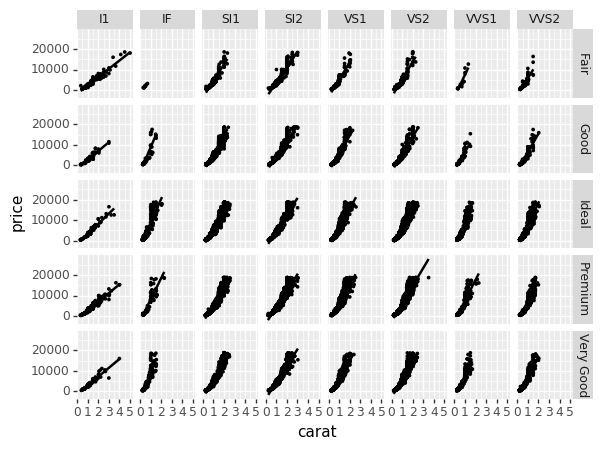

<ggplot: (8779757311766)>

In [71]:
gg.ggplot(mapping=gg.aes(x='carat', y='price'), data=diamonds) + \
    gg.facet_grid('cut ~ clarity') + \
    gg.geom_point(shape='.') + \
    gg.geom_smooth()


CHALLENGE: You could also try starting with a histogram and adding densities. (`geom_density`), Try [this link](https://stackoverflow.com/questions/5688082/ggplot2-overlay-histogram-with-density-curve).

```{r}

```

In [88]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [92]:
# gg.ggplot(data=diamonds) + \
#     gg.facet_grid('cut ~ clarity') + \
#     gg.geom_histogram(gg.aes(y='price')) + gg.geom_density(color = "red")

PlotnineError: 'stat_bin() must not be used with a y aesthetic.'

# Themes and plot cleanup

I like a slightly cleaner look to my plots. Luckily, ggplot allows you to add "themes" to your plots. Try doing the same plot but adding `+ theme_bw()` or `+ theme_classic()`. Different themes work better for different applications, in my experience. My favorite right now is `ggthemes::theme_few`.

You can also try different color scales. Experiment with `scale_color_...` - try writing that and hitting TAB for autocomplete options. Check out the help on this. 

You can also try transparency/different point sizes to clean up scatterplots. Try `alpha = .1` or `pch = "."` to make transparent or small points. 

Finally, don't forget to "fix the axis labels"! 

Here's a somewhat ugly plot - see if you can make it look awesome. 

```{r}
ggplot(diamonds, aes(x = carat, y = price, col = cut)) + 
  geom_point() + 
  facet_wrap(~clarity)
```

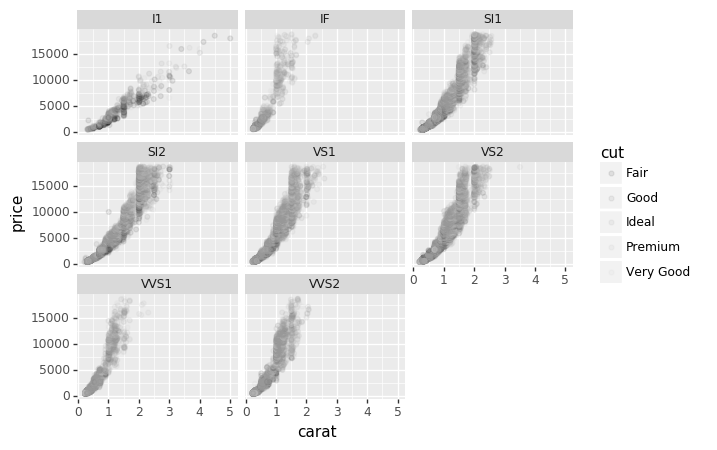

<ggplot: (8779759658027)>

In [85]:
gg.ggplot(diamonds, gg.aes(x = 'carat', y = 'price', color = 'cut')) + \
  gg.geom_point(alpha = .1) + \
  gg.facet_wrap('~clarity') + \
  gg.scale_color_gray()